# 逻辑回归预测考试通过

### 任务:

基于examdata.csv数据，建立逻辑回归模型 预测Exam1 = 75, Exam2 = 60时，该同学在Exam3是 passed or failed; 建立二阶边界，提高模型准确度

In [2]:
#加载库
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#加载数据
data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


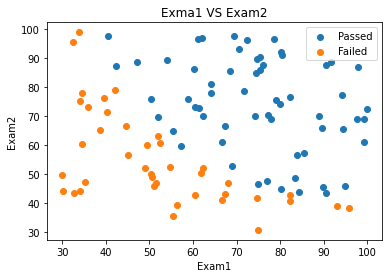

In [4]:
#可视化数据
mask = data.loc[:,'Pass']==1
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exma1 VS Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('Passed','Failed'))
plt.show()

In [8]:
#定义训练数据参数
X = data.drop(['Pass'],axis=1)
y = data.loc[:,'Pass']
X1 = data.loc[:,'Exam1']
X2 = data.loc[:,'Exam2']

In [9]:
print(X.shape,y.shape)

(100, 2) (100,)


In [10]:
#运用sklearn逻辑回归训练
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X,y)

LogisticRegression()

In [12]:
#展示训练结果
y_predict = LR.predict(X)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [13]:
#准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.89


In [14]:
#训练新数据并打印结果
y_test = LR.predict([[70,65]])
print('pass' if y_test == 1 else 'fail')

pass


***

边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

![linear_boundary.png](images/linear_boundary.png)

In [16]:
#绘制回归线条_1
#需要theta0,theta1,theta2三个参数
theta0 = LR.intercept_
theta1 , theta2 = LR.coef_[0][0],LR.coef_[0][1]

In [17]:
Y = -(theta0+theta1*X1)/theta2
Y

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64

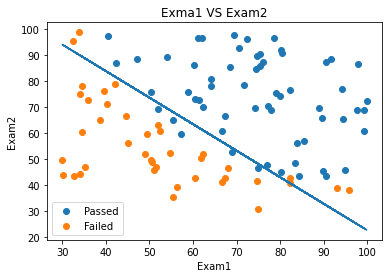

In [18]:
#绘制图像_2
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(X1,Y)
plt.title('Exma1 VS Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('Passed','Failed'))
plt.show()

## 二阶边界函数

边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

In [19]:
#参数需要theta0~5,X1,X2,X1X2
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2

In [22]:
#新建训练数据集
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
X_new.head()

,X1,X2,X1_2,X2_2,X1_X2
0,34.623660,78.024693,1198.797805,6087.852690,2701.500406
1,30.286711,43.894998,917.284849,1926.770807,1329.435094
2,35.847409,72.902198,1285.036716,5314.730478,2613.354893
3,60.182599,86.308552,3621.945269,7449.166166,5194.273015
4,79.032736,75.344376,6246.173368,5676.775061,5954.672216


In [23]:
# 新训练
LR2 = LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression()

In [25]:
y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(y,y2_predict)
print(accuracy2)

1.0


In [31]:
#排列X已便于顺序绘图
X1_new = X1.sort_values()
X1_new

63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype: float64

边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

$a x^2 + b x + c=0: x1 = (-b+(b^2-4ac)^.5)/2a,x1 = (-b-(b^2-4ac)^.5)/2a$

$\theta_4 X_2^2 + (\theta_5 X_1++ \theta_2) X_2 + (\theta_0 + \theta_1 X_1 + \theta_3 X_1^2)=0$

In [33]:
theta0 = LR2.intercept_
theta0,theta2,theta3,theta4,theta5=LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
Y2 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
Y2

63    133.267133
1     132.059529
57    120.572076
70    119.882154
36    114.415510
         ...    
56     39.617419
47     39.592100
51     39.297582
97     39.289434
75     39.191866
Name: Exam1, Length: 100, dtype: float64

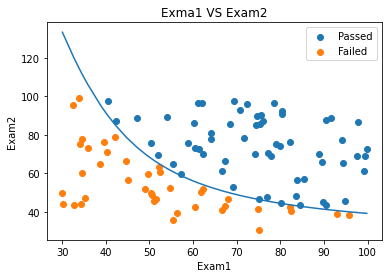

In [34]:
#绘制二阶边界函数图像
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(X1_new,Y2)
plt.title('Exma1 VS Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('Passed','Failed'))
plt.show()